In [21]:
import gffpandas.gffpandas as gffpd

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

path_to_data='/Users/aleksandradenisova/Desktop/coursework/data/'

In [22]:
annotation = gffpd.read_gff3('{}stage2/{}'.format(path_to_data, 'GCF_003957565.2_bTaeGut1.4.pri_genomic.gff'))
print(annotation.header)

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build bTaeGut1.4.pri
#!genome-build-accession NCBI_Assembly:GCF_003957565.2
#!annotation-source NCBI Taeniopygia guttata Annotation Release 106
##sequence-region NC_044211.2 1 114020016
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=59729



In [23]:
df_ori = annotation.df
df_ori['chrom']=df_ori['seq_id']
df = df_ori[df_ori['type']=='gene']

In [24]:
df_ori['type'].unique()

array(['region', 'gene', 'lnc_RNA', 'exon', 'mRNA', 'CDS', 'tRNA',
       'transcript', 'primary_transcript', 'miRNA', 'pseudogene',
       'snoRNA', 'guide_RNA', 'snRNA', 'C_gene_segment', 'V_gene_segment',
       'cDNA_match', 'rRNA', 'sequence_feature'], dtype=object)

In [25]:
df['element_ID'] = df['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
background = df['element_ID'].tolist()
len(background)

21732

In [26]:
go_BP = gp.get_library(name='GO_Biological_Process_2021', organism='Human')
go_MF = gp.get_library(name='GO_Molecular_Function_2021', organism='Human')
go_CC = gp.get_library(name='GO_Cellular_Component_2021', organism='Human')
go_reactome = gp.get_library(name='Reactome_2016', organism='Human')

In [43]:
def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr

def plot(df, bg, name):
    name = ' '.join(name.split('_'))
    barplot(df.res2d,title= name+bg, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')

In [28]:
!ls /Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv

/Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv


In [34]:
df2 = pd.read_csv(f'{path_to_data}final_data/two_alleles.tsv', sep = '\t')

In [35]:
df2

,Unnamed: 0,start,cons,inno,non_inno,Ref_inno,Alt_noninno,n_inno,n_noninno,n,inno_N,inno_-,noninno_N,noninno_-,chrom
0,98374,116362,True,False,False,T,C,3,3,6,0,1,0,1,NC_044211.2
1,134527,154944,True,False,False,C,T,3,3,6,0,1,0,1,NC_044211.2
2,368370,407364,True,False,False,A,G,4,4,8,0,0,0,0,NC_044211.2
3,419697,476837,True,False,False,G,A,3,3,6,0,0,0,0,NC_044211.2
4,433404,497978,True,False,False,T,C,3,3,6,0,0,0,0,NC_044211.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12266,32257,1994534,True,False,False,C,T,3,3,6,0,0,0,1,NC_044243.2
12267,7,968478,True,False,False,A,G,3,3,6,0,0,0,1,NC_054766.1
12268,6906,576827,True,False,False,A,G,4,4,8,0,0,0,0,NC_054767.1
12269,1785,1757167,True,False,False,T,G,3,3,6,0,0,0,0,NC_054769.1


In [36]:
df3 = pd.read_csv('/Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv', sep = '\t')
df3

,Unnamed: 0,start,cons,inno,non_inno,Ref_inno,Alt_noninno,n_inno,n_noninno,n,inno_N,inno_-,noninno_N,noninno_-,chrom
0,98374,116362,True,False,False,T,C,3,3,6,0,1,0,1,NC_044211.2
1,134527,154944,True,False,False,C,T,3,3,6,0,1,0,1,NC_044211.2
2,368370,407364,True,False,False,A,G,4,4,8,0,0,0,0,NC_044211.2
3,419697,476837,True,False,False,G,A,3,3,6,0,0,0,0,NC_044211.2
4,433404,497978,True,False,False,T,C,3,3,6,0,0,0,0,NC_044211.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12262,745892,2296113,True,False,False,C,G,3,3,6,0,0,0,0,NC_044242.2
12263,843976,2435753,True,False,False,A,G,3,3,6,0,1,0,1,NC_044242.2
12264,8217,250939,True,False,False,C,T,3,3,6,0,0,0,0,NC_044243.2
12265,20951,465737,True,False,False,T,C,3,3,6,0,0,0,0,NC_044243.2


10661

cons
number of positions:  12271
1206
inno
number of positions:  13637
1188
non_inno
number of positions:  10663
1026


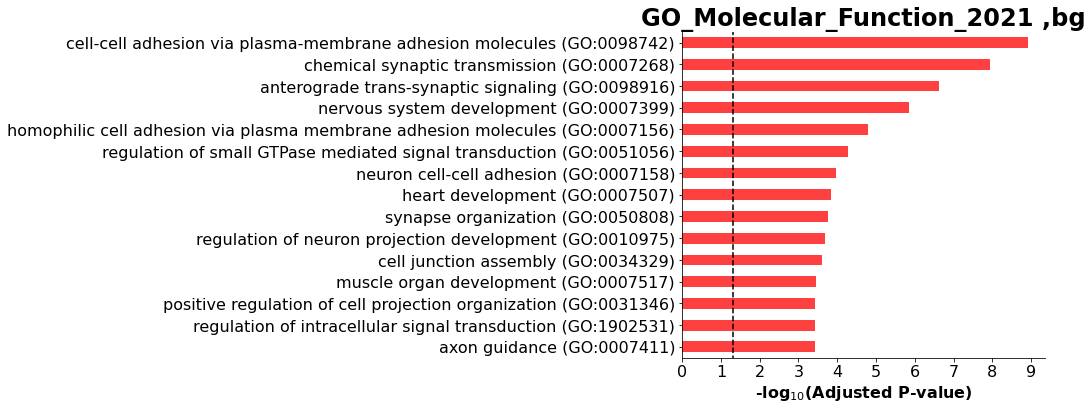

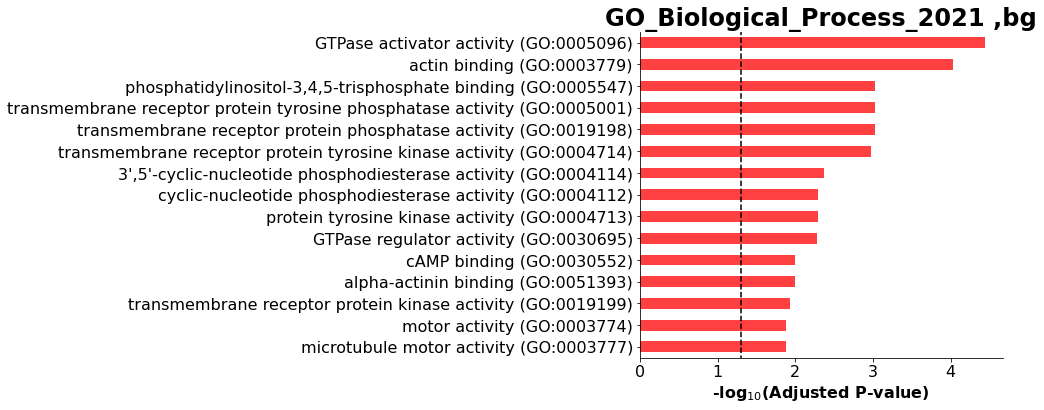

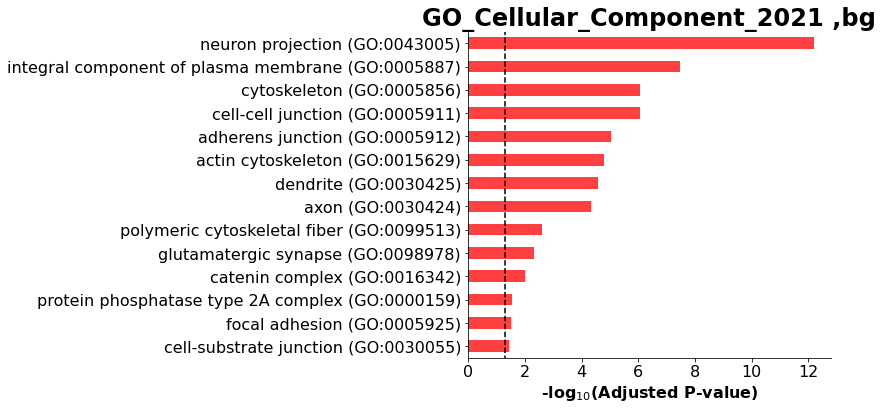

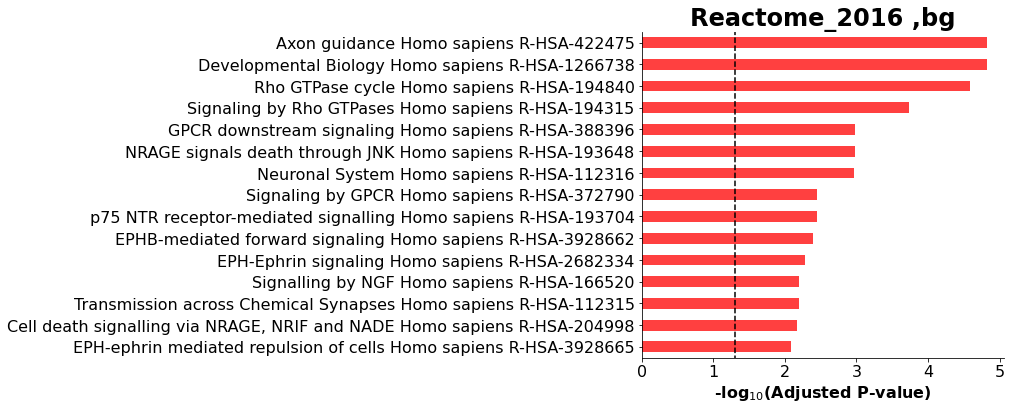

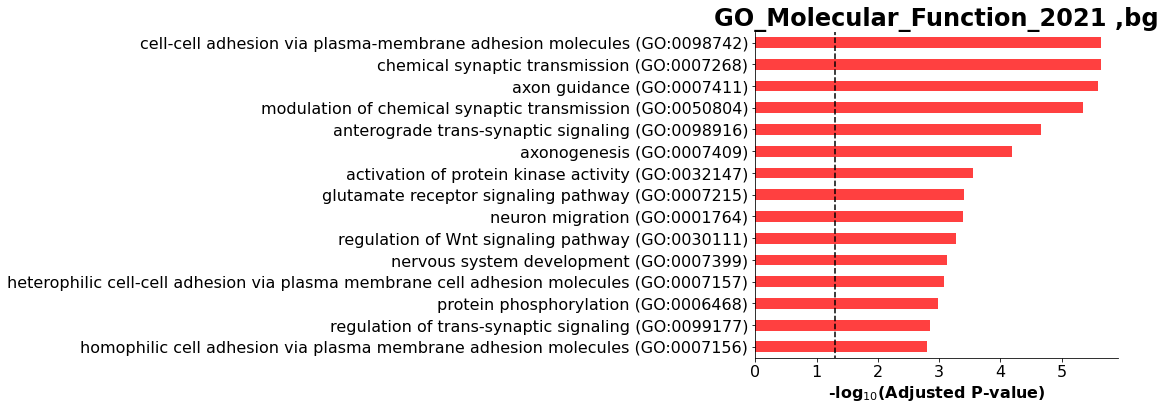

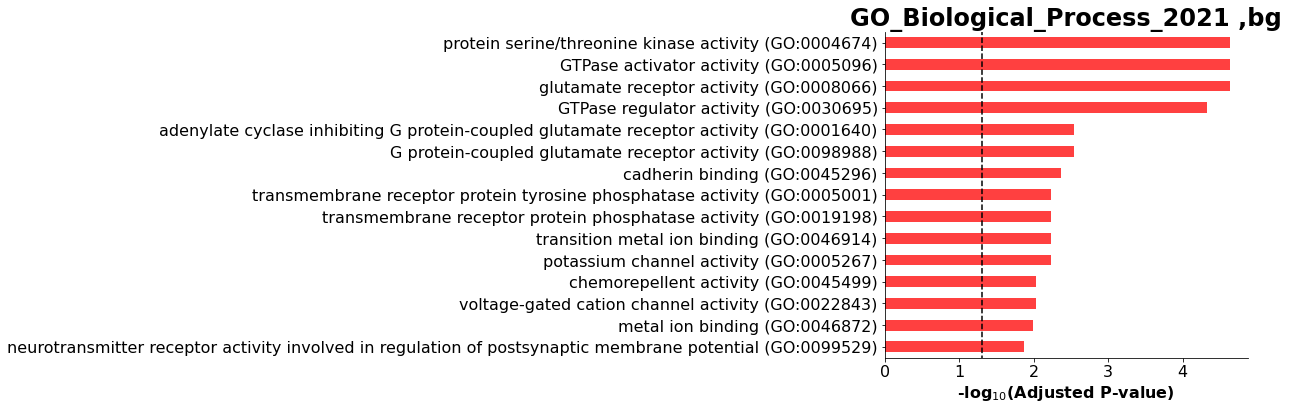

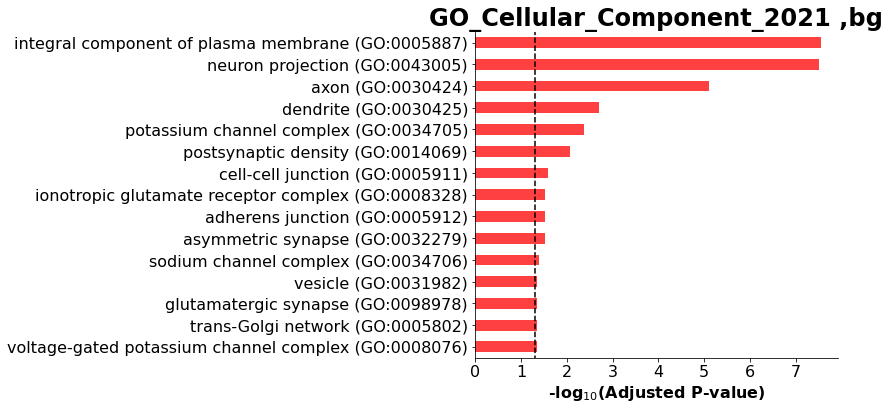

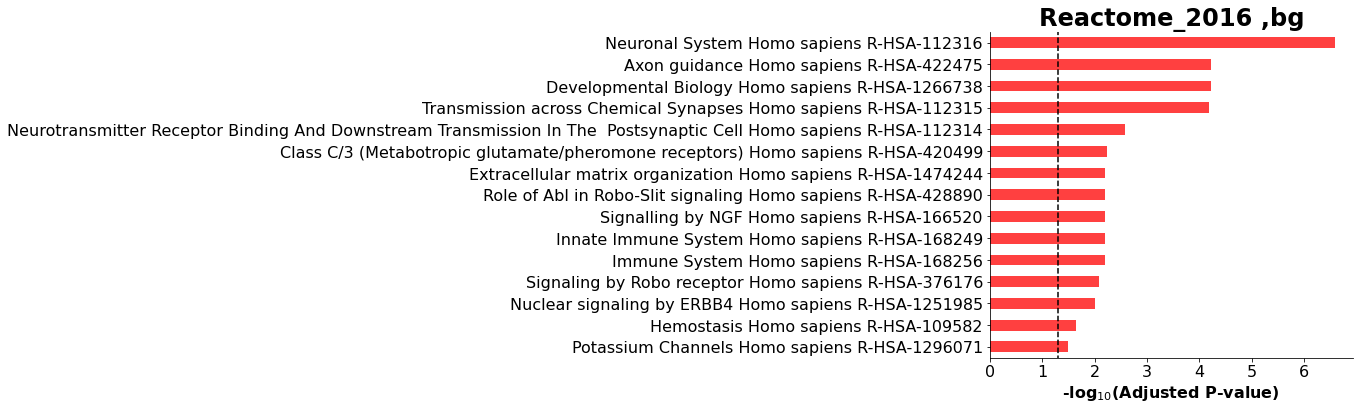

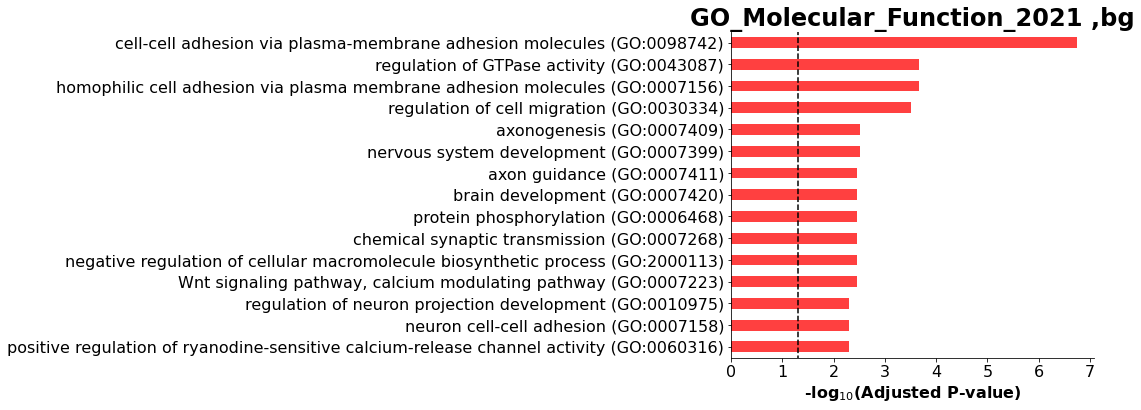

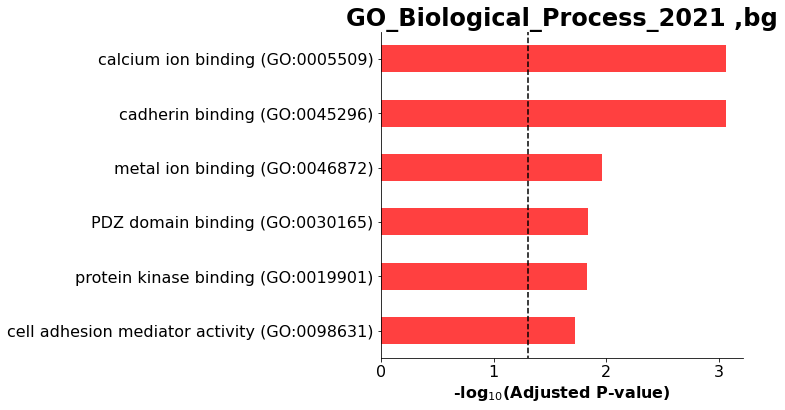

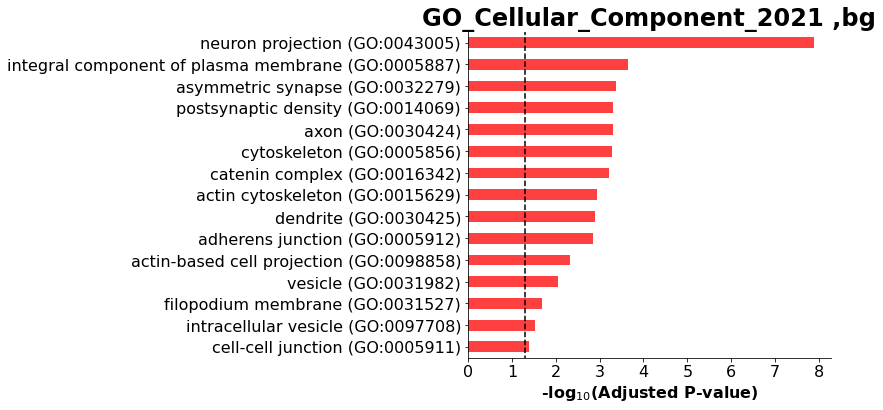

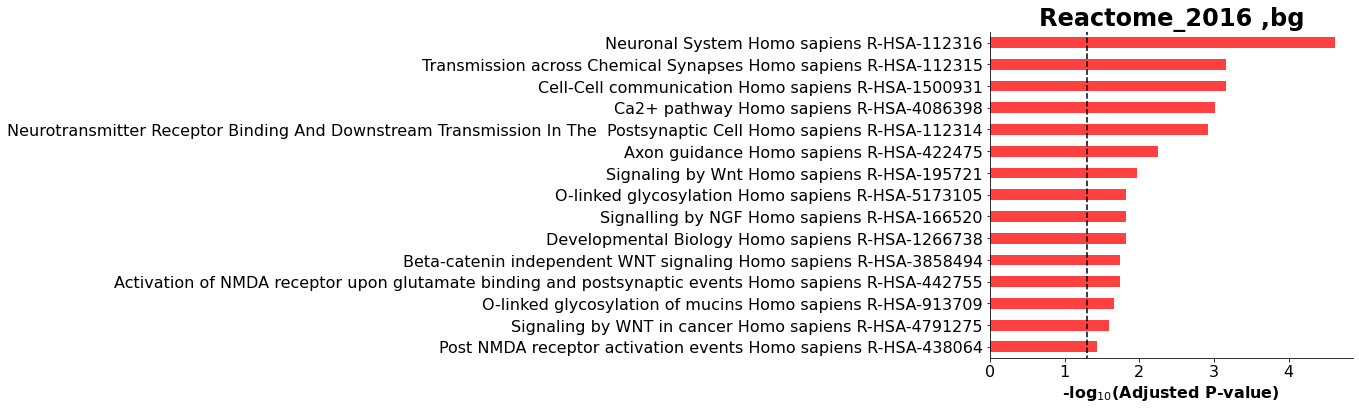

In [33]:
genelists = []
cons_in_table = ['cons','inno','non_inno']
table_names = ['two_alleles.tsv', 'fixed_inno.tsv', 'fixed_noninno.tsv']

df2 = pd.read_csv(f'{path_to_data}final_data/two_alleles.tsv', sep = '\t')

df2['start'] = df2['start']+1 
all_tabels = []
all_dfs = []
for i in range(3):
    print(cons_in_table[i])

    df2 = pd.read_csv(f'{path_to_data}final_data/{table_names[i]}', sep = '\t')
    
    print(f'number of positions:  {df2.shape[0]}')

    df2['start'] = df2['start']+1 
    
    df3 = df2[(((df2['n_inno']>=4)&(df2['n_noninno']>=4)) |
              (((df2['n_inno']==3)&(df2['n_noninno']==4))&((df2['inno_N']==1)|(df2['inno_-']==1)))|
             (((df2['n_noninno']==3)&(df2['n_inno']==4))&((df2['noninno_N']==1)|(df2['noninno_-']==1))))
              &(df2[cons_in_table[i]]==True)]

    all_dfs.append(df3)
    matched_list = []

    for chrom in df3['chrom'].unique():
        df3_chrom = df3[df3['chrom']== chrom]
        df_chrom = df[df['chrom']==chrom]

        for idx in df3_chrom.index:
            df_small = df_chrom[(df_chrom['start']<=df3_chrom.loc[idx]['start'])
                                         &(df_chrom['end']>=df3_chrom.loc[idx]['start'])]
            df_small['coord'] = int(df3_chrom.loc[idx]['start'])
            df_small['coord'] = df_small['coord']+1
            df_small['type'] = cons_in_table[i]
            matched_list.append(df_small)
    df_genes = pd.concat(matched_list)

    df_genes['element_ID'] = df_genes['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
    df_genes.head()

    genelist = list(set(df_genes['element_ID'].to_list()))
    genelists.append(set(genelist))
    print(len(genelist))
    all_tabels.append(df_genes)

    l = -np.log10(0.05)



    plot(get_df(go_BP, genelist, background), 'bg', 'GO_Molecular_Function_2021')
    plot(get_df(go_MF, genelist, background), 'bg', 'GO_Biological_Process_2021')
    plot(get_df(go_CC, genelist, background), 'bg', 'GO_Cellular_Component_2021')
    plot(get_df(go_reactome, genelist, background), 'bg', 'Reactome_2016')

relult_df = pd.concat(all_tabels)
all_df = pd.concat(all_dfs)
all_df['coord']=all_df['start']+1

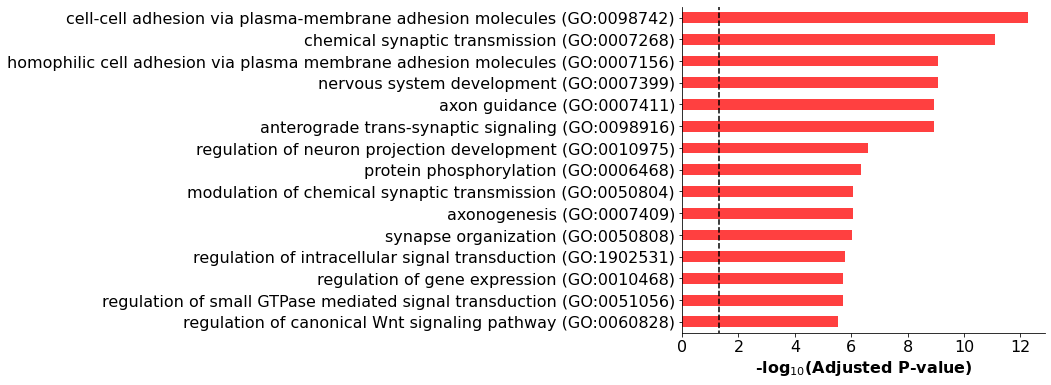

In [75]:
def plot_proc(df):
    barplot(df, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')
    df_proc.head()

df_proc = get_df(go_BP, genelists_all, background).res2d
plot_proc(df_proc)

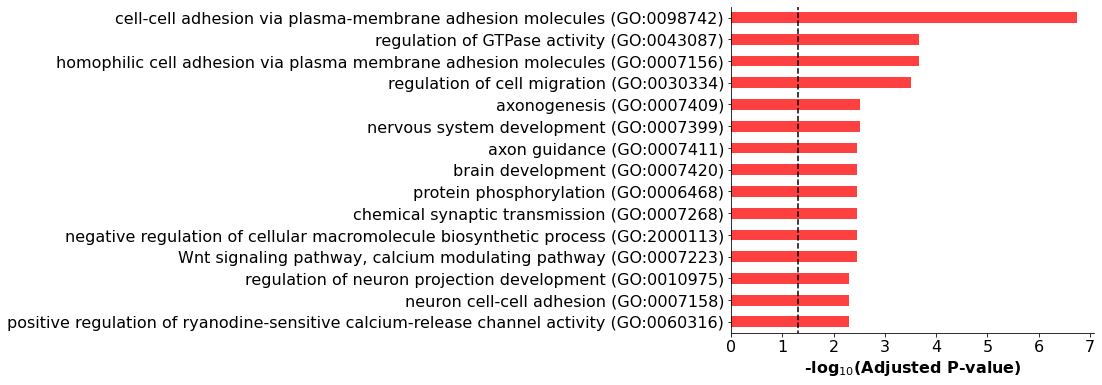

In [70]:
df_proc = df_proc[df_proc['Adjusted P-value']<0.05]
df_to_check = df_proc[['Term', 'Adjusted P-value']].reset_index(drop=True)

#df_to_merge = df_proc.loc[:, ~df_proc.columns.isin(['Term', 'Adjusted P-value'])].reset_index(drop=True)

plot_proc(df_to_check)

In [73]:
df_proc.sort_values(by = 'Adjusted P-value')

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes
389,CUSTOM140501053070272,cell-cell adhesion via plasma-membrane adhesio...,26/119,5.440787e-11,1.819943e-07,4.741794,CDH4;GPC6;IL1RAPL1;ROBO2;TENM1;CDH12;DSCAM;ROB...
870,CUSTOM140501053070272,homophilic cell adhesion via plasma membrane a...,13/47,1.898417e-07,2.116735e-04,6.019458,CDH4;ITGB1;CNTN4;CDH2;PTPRT;NECTIN1;ROBO2;TENM...
2427,CUSTOM140501053070272,regulation of GTPase activity (GO:0043087),24/148,1.407369e-07,2.116735e-04,3.515993,USP6NL;TGM2;NTRK2;FGD5;PRKG1;SRGAP2;EPHA1;PLXN...
2543,CUSTOM140501053070272,regulation of cell migration (GO:0030334),39/339,3.614221e-07,3.022392e-04,2.494669,ARSB;PDGFRA;SEMA5A;AMOTL1;ROR2;ERBB4;FGF1;CTNN...
1531,CUSTOM140501053070272,nervous system development (GO:0007399),38/364,5.387911e-06,3.003760e-03,2.259780,IL1RAPL2;ADGRV1;CELSR1;ROBO2;ERBB4;TENM1;DSCAM...
279,CUSTOM140501053070272,axonogenesis (GO:0007409),27/216,4.765956e-06,3.003760e-03,2.706451,SPG11;ROBO2;CTNNA2;DSCAM;ROBO1;SPTBN1;DAB1;FEZ...
141,CUSTOM140501053070272,"Wnt signaling pathway, calcium modulating path...",9/32,1.279846e-05,3.567570e-03,6.170924,CALM1;PPP3R1;AGO3;FZD3;FZD6;TCF7L2;TNRC6B;GNAO...
1291,CUSTOM140501053070272,negative regulation of cellular macromolecule ...,43/450,1.261252e-05,3.567570e-03,2.067902,MYBBP1A;CTBP1;RORB;DAP;RARA;TCF7L2;GLI3;ZNF423...
2324,CUSTOM140501053070272,protein phosphorylation (GO:0006468),41/421,1.274407e-05,3.567570e-03,2.107179,PDGFRA;CTBP1;MAPK8;NTRK2;ERBB4;TNNI3K;CDK1;RPS...
529,CUSTOM140501053070272,chemical synaptic transmission (GO:0007268),28/236,8.762236e-06,3.567570e-03,2.567827,CALM1;SPG11;CAMKK1;CACNA1E;RPS6KA1;GRIN2B;DLG2...


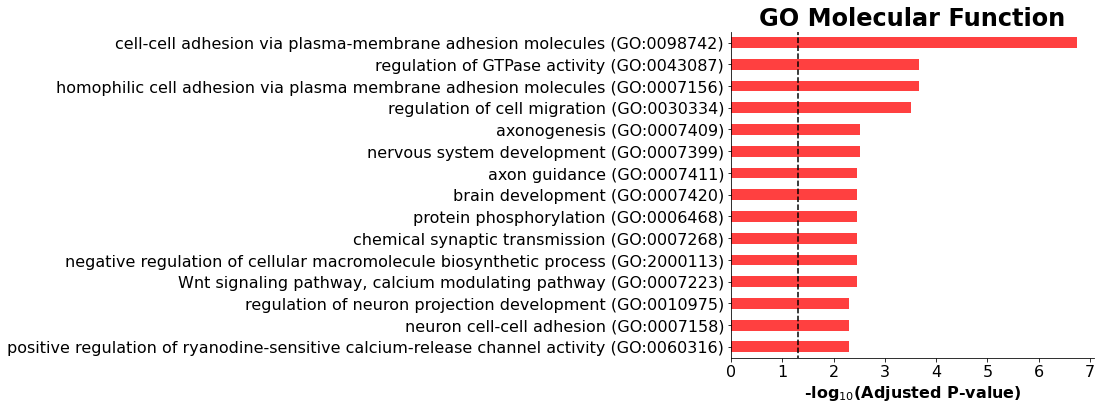

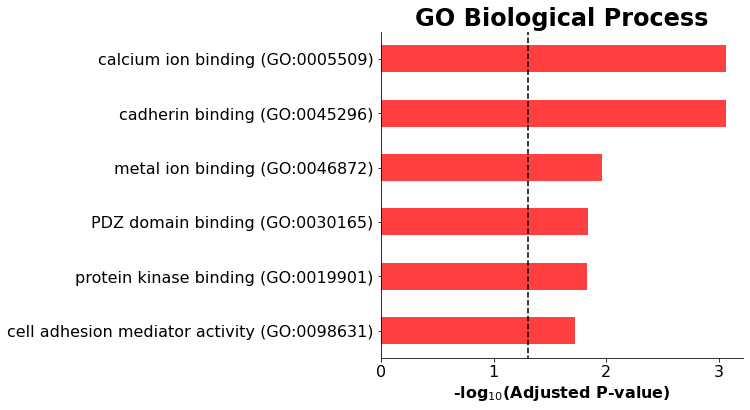

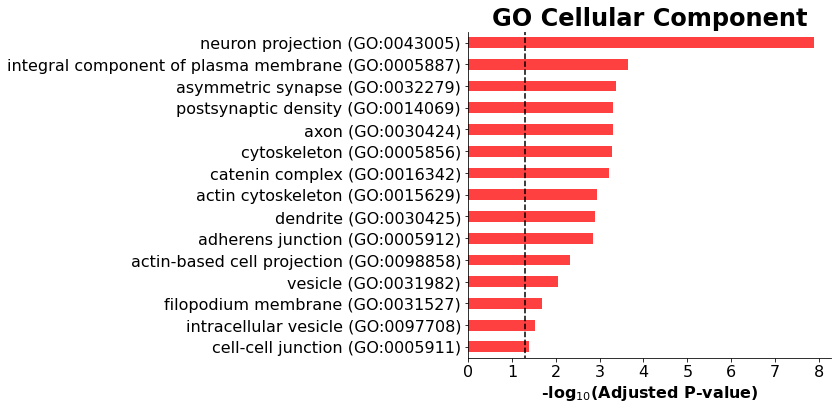

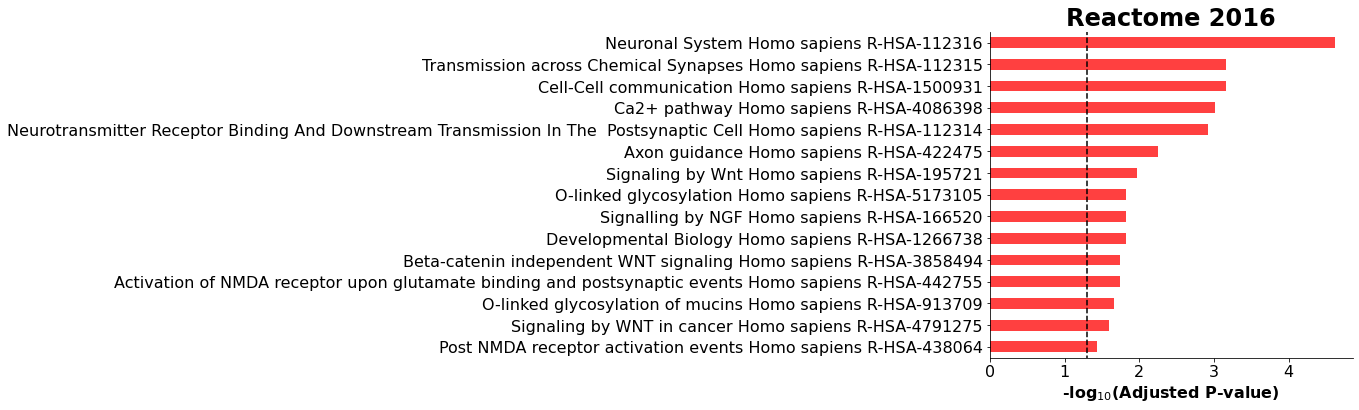

In [49]:
genelists_all = list(genelists[0]|genelists[1]|genelists[2])
plot(get_df(go_BP, genelist, background),'', 'GO_Molecular_Function')
plot(get_df(go_MF, genelist, background), '', 'GO_Biological_Process')
plot(get_df(go_CC, genelist, background), '', 'GO_Cellular_Component')
plot(get_df(go_reactome, genelist, background), '', 'Reactome_2016')

In [50]:
print('\n'.join(genelists_all))

LOC116808593
P2RX6
LOC115496758
LOC121469866
LOC121469489
PKIG
LOC121469510
LOC115494452
PNLDC1
HS6ST2
GPATCH2
FLNB
NR2C2
MGA
KHDC4
ZNF532
GASK1A
CZH9orf85
WDR70
RAB33B
RIMS4
TBXT
LOC116808471
MOCOS
MED13L
SMOC2
LOC115493743
NAV2
ARNT2
ADCY9
ATXN10
DCT
BAG3
LOC100226555
FMR1
LOC115497249
NWD2
MGAT4B
KLHL13
LOC121468089
TMEM61
APPL2
NEB
LOC100227265
GBE1
OBSL1
ADARB2
LOC100225953
EPN2
CADPS
SDCCAG8
EXTL3
ALPK3
COMMD10
ULK4
ADAP1
DLC1
LRRC7
LOC115493641
UNC13D
LOC115497630
LOC100228799
FRMD3
LOC101233878
PCDH11X
TARS1
LHPP
IL12B
PPP3R1
LNX1
VPS13B
LTBP2
GHITM
CDC40
MED9
SRGAP3
PGGT1B
CABP7
LOC121469806
RHOF
LOC115493509
NCOR2
SLC25A24
SLC16A2
GTF2IRD1
CCDC9B
VWC2L
AP3B1
LOC115498584
DROSHA
UST
RERE
GAL3ST2
DAAM2
GPC5
G3BP2
IL1RAPL1
GNAL
SLC29A3
HS2ST1
ATP1A1
FGF1
CDK1
LOC115494899
IQCB1
LRP1B
HLCS
VPS35
CAMK2G
LOC115490831
LOC100231837
LARGE1
STIM2
LOC115494504
SUCLG2
ADAM9
PCBP3
SIL1
WWP2
KIAA1549
LOC115493829
CAVIN2
TRIM33
MIER3
ITGB1
GRIP2
LOC100219073
CHRNG
ARNTL
LOC121469220
SNX6
CA

In [52]:
len(genelists_all)

2786

In [74]:
genelists_all

['LOC116808593',
 'P2RX6',
 'LOC115496758',
 'LOC121469866',
 'LOC121469489',
 'PKIG',
 'LOC121469510',
 'LOC115494452',
 'PNLDC1',
 'HS6ST2',
 'GPATCH2',
 'FLNB',
 'NR2C2',
 'MGA',
 'KHDC4',
 'ZNF532',
 'GASK1A',
 'CZH9orf85',
 'WDR70',
 'RAB33B',
 'RIMS4',
 'TBXT',
 'LOC116808471',
 'MOCOS',
 'MED13L',
 'SMOC2',
 'LOC115493743',
 'NAV2',
 'ARNT2',
 'ADCY9',
 'ATXN10',
 'DCT',
 'BAG3',
 'LOC100226555',
 'FMR1',
 'LOC115497249',
 'NWD2',
 'MGAT4B',
 'KLHL13',
 'LOC121468089',
 'TMEM61',
 'APPL2',
 'NEB',
 'LOC100227265',
 'GBE1',
 'OBSL1',
 'ADARB2',
 'LOC100225953',
 'EPN2',
 'CADPS',
 'SDCCAG8',
 'EXTL3',
 'ALPK3',
 'COMMD10',
 'ULK4',
 'ADAP1',
 'DLC1',
 'LRRC7',
 'LOC115493641',
 'UNC13D',
 'LOC115497630',
 'LOC100228799',
 'FRMD3',
 'LOC101233878',
 'PCDH11X',
 'TARS1',
 'LHPP',
 'IL12B',
 'PPP3R1',
 'LNX1',
 'VPS13B',
 'LTBP2',
 'GHITM',
 'CDC40',
 'MED9',
 'SRGAP3',
 'PGGT1B',
 'CABP7',
 'LOC121469806',
 'RHOF',
 'LOC115493509',
 'NCOR2',
 'SLC25A24',
 'SLC16A2',
 'GTF2IRD1',
 '